# Imports

In [1]:
import os

print("Current Working directory:", os.getcwd())

Current Working directory: c:\Users\mengi\Desktop\research\Investigating_CNNs


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random
from cfg import device, DATASET_PATH, IMG_SIZE, TEST_BATCH_SIZE, VAL_BATCH_SIZE, TRAIN_BATCH_SIZE, fashion_mnist_classes

from cnn import LeNetBasedModel
from train import test
from train import train as train_f


mnist_classes = [f'{x}' for x in range(0, 10)]

device

device(type='cuda')

# Load Datasets

In [3]:
directory = DATASET_PATH
files = os.listdir(directory)
files

['fashion-mnist', 'mnist']

In [4]:
from load import MNIST, FashionMNIST

mnist_dataset = MNIST()
mnist_train_loader = mnist_dataset.train_loader
mnist_test_loader = mnist_dataset.test_loader


fashion_dataset = FashionMNIST()
fashion_train_loader = fashion_dataset.train_loader
fashion_test_loader = fashion_dataset.test_loader

In [5]:
from datasets import *


train_loaders = {}
test_loaders = {}

for cls_idx in range(10):
    train_loaders[cls_idx] = DataLoader(
        SingleColorsForAllButOneDatasetGenerator(
            dataset=mnist_dataset.train_dataset,
            outlier_cls_idx=cls_idx,
            num_outlier_colors=100
        ),
        batch_size=TRAIN_BATCH_SIZE,
        shuffle=True
    )

    test_loaders[cls_idx] = DataLoader(
        SingleColorsForAllButOneDatasetGenerator(
            dataset=mnist_dataset.test_dataset,
            outlier_cls_idx=cls_idx,
            num_outlier_colors=100
        ),
        batch_size=TEST_BATCH_SIZE,
        shuffle=False
    )

train_loaders[10] = DataLoader(
    ForEachInstanceRandomlyColorsDatasetGenerator(
        dataset=mnist_dataset.train_dataset,
    ),
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True
)

test_loaders[10] = DataLoader(
    ForEachInstanceRandomlyColorsDatasetGenerator(
        dataset=mnist_dataset.test_dataset,
    ),
    batch_size=TEST_BATCH_SIZE,
    shuffle=False
)

# Visualize the color dynamics

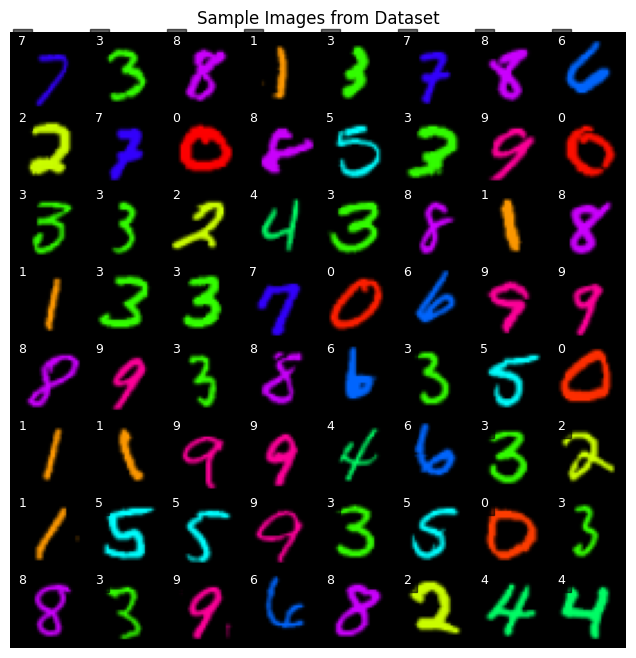

In [6]:
from utils import show_images_from_loader, show_images_from_loader_of_class

show_images_from_loader(
    train_loaders[0], classes=mnist_classes, n_images=64)

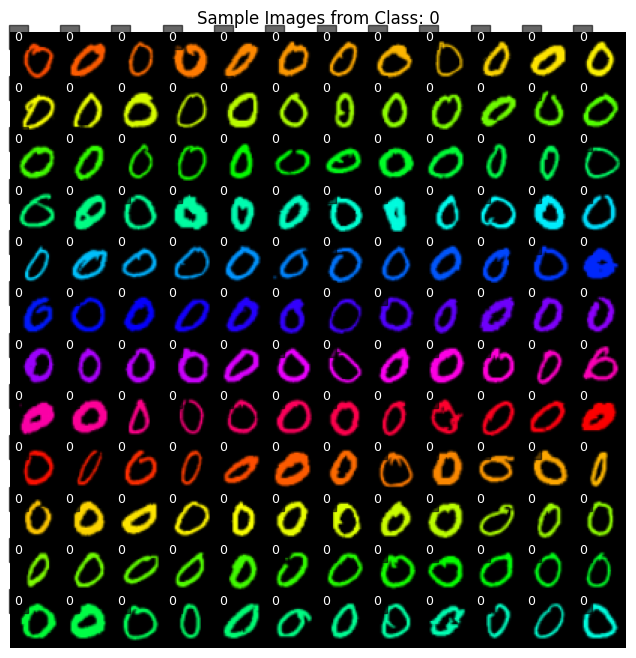

In [7]:
show_images_from_loader_of_class(
    classes=mnist_classes, loader=train_loaders[0], n_images=144, target_class_idx=0)

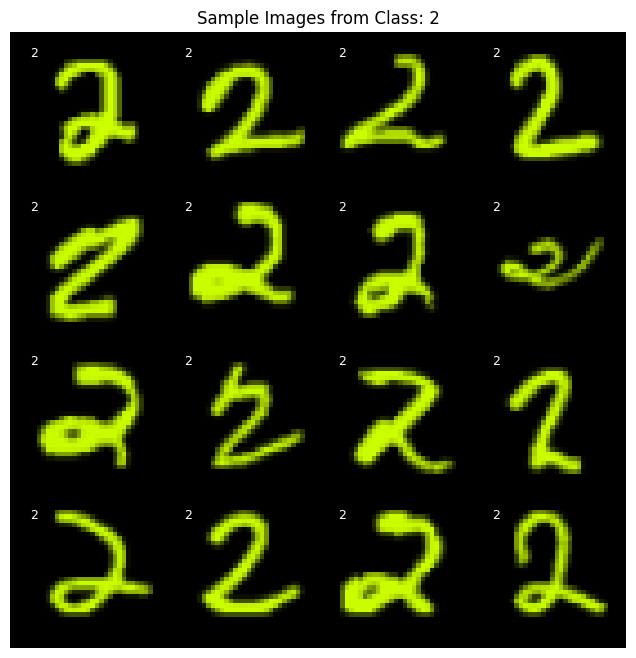

In [8]:
show_images_from_loader_of_class(
    classes=mnist_classes, loader=train_loaders[0], n_images=16, target_class_idx=2)

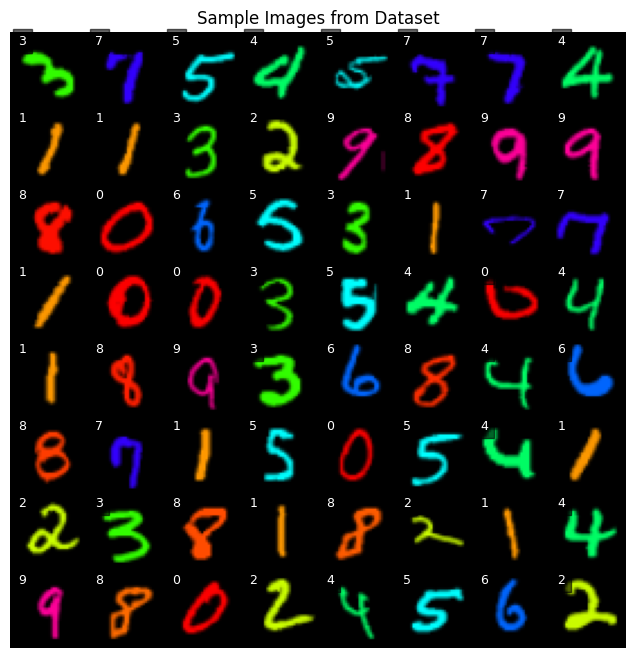

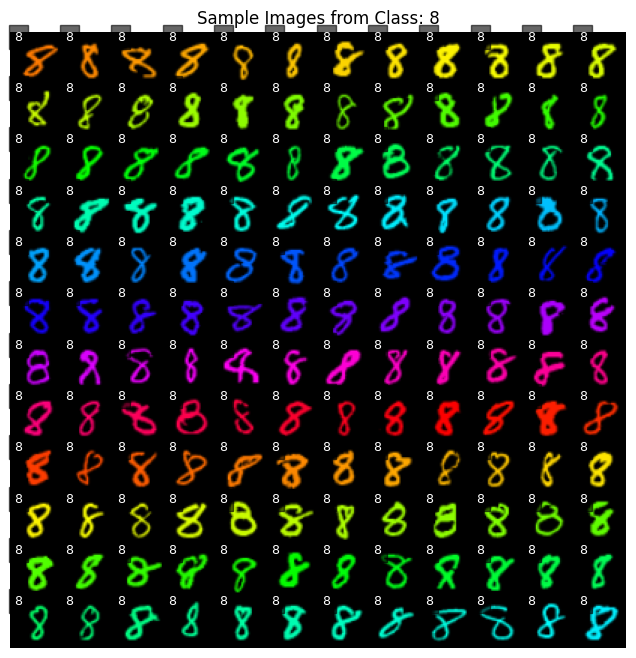

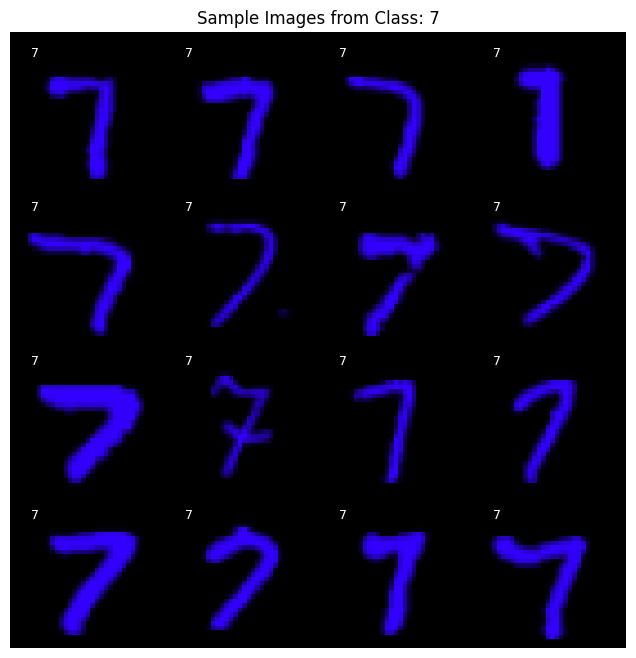

In [9]:
show_images_from_loader(
    train_loaders[8], classes=mnist_classes, n_images=64)
show_images_from_loader_of_class(
    classes=mnist_classes, loader=train_loaders[8], n_images=144, target_class_idx=8)
show_images_from_loader_of_class(
    classes=mnist_classes, loader=train_loaders[8], n_images=16, target_class_idx=7)

No outlier class dataset: each instance has images generated randomly

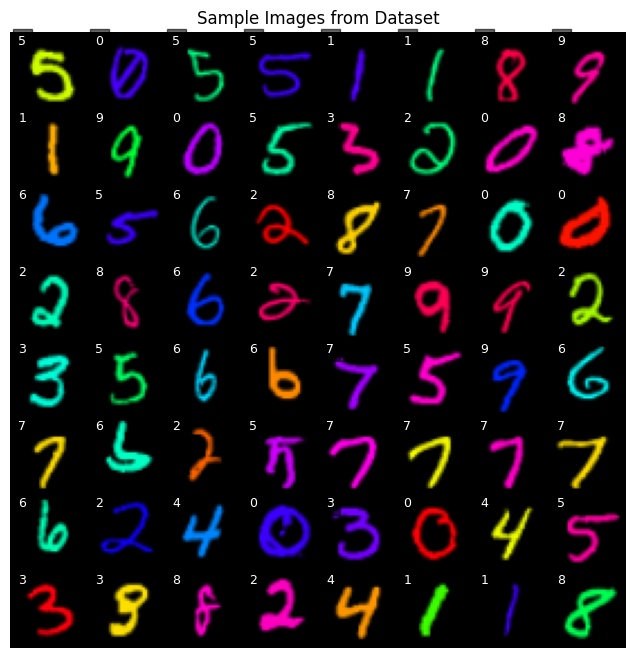

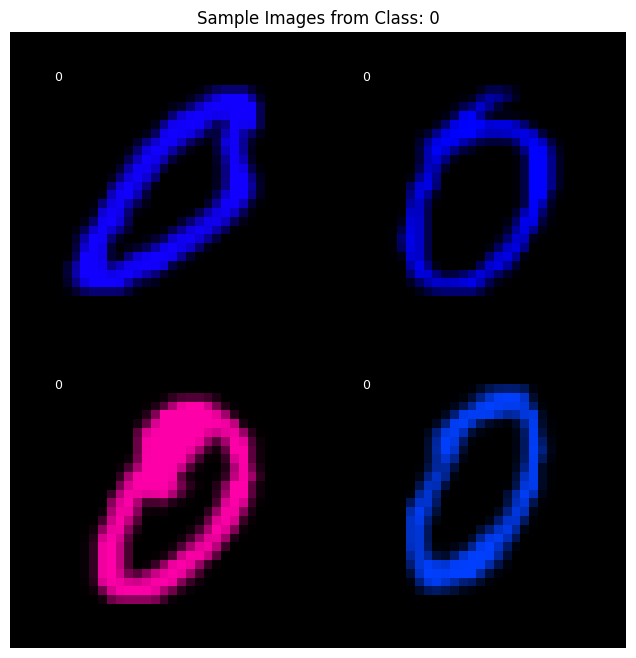

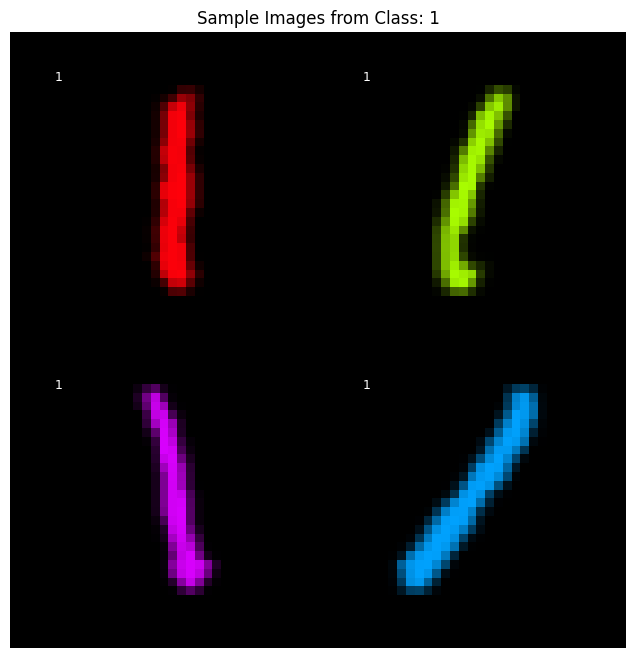

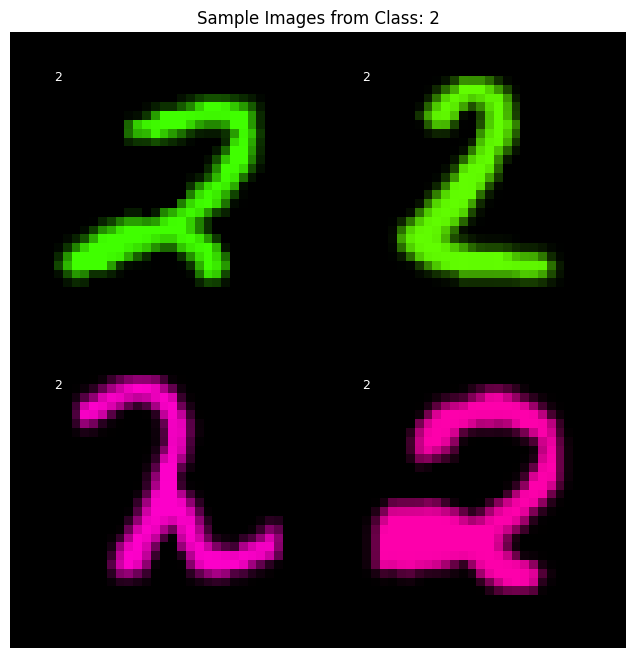

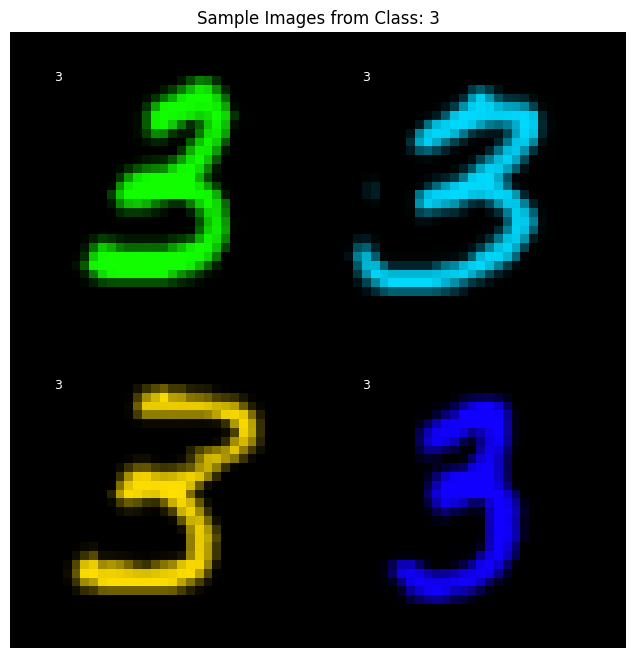

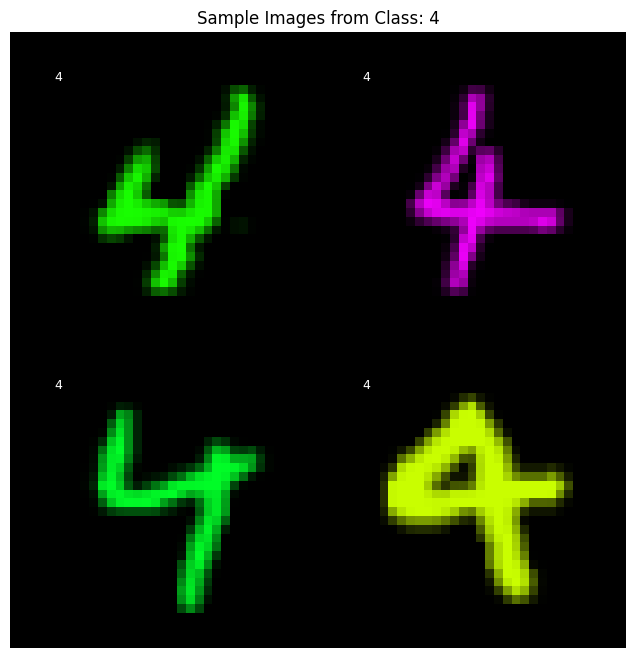

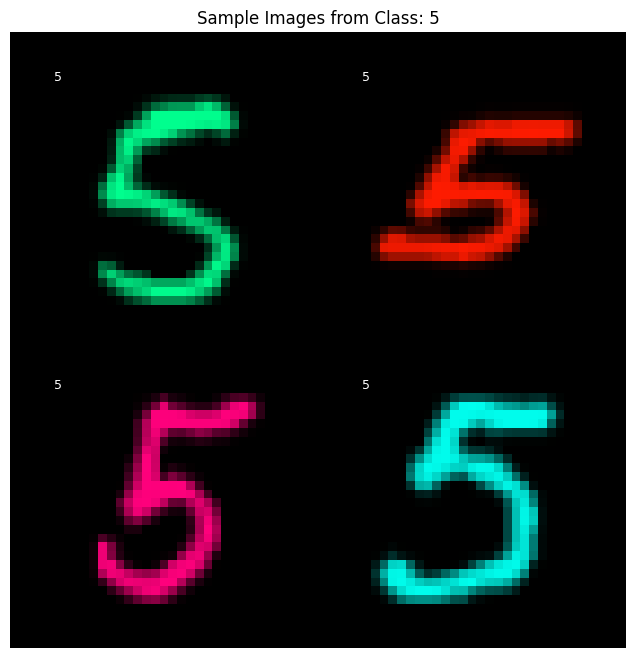

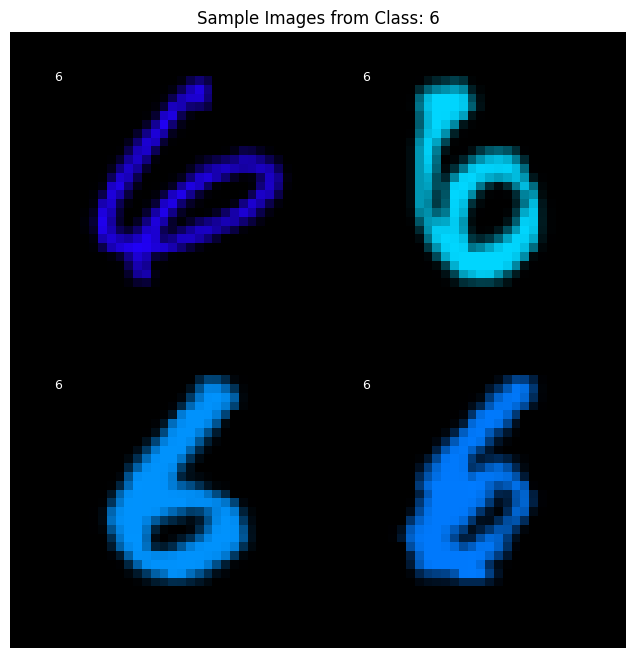

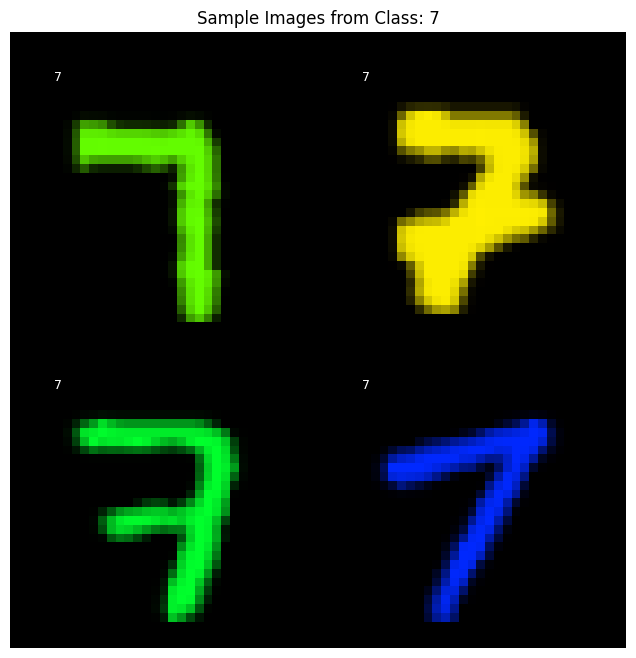

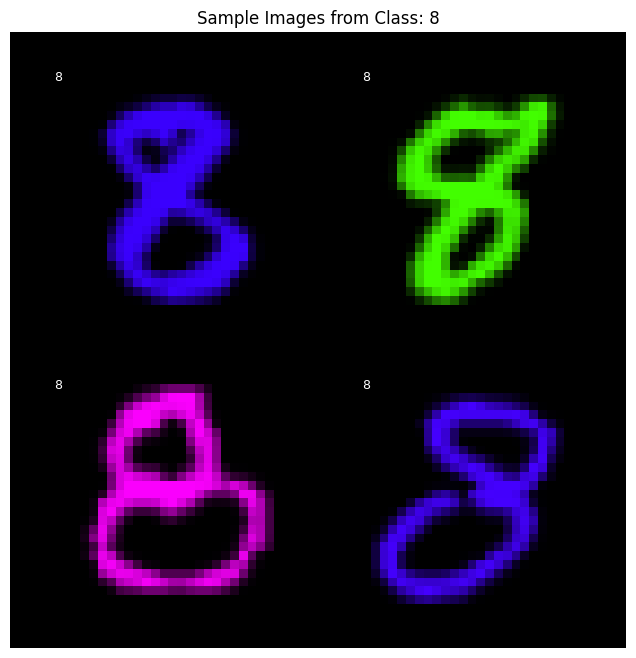

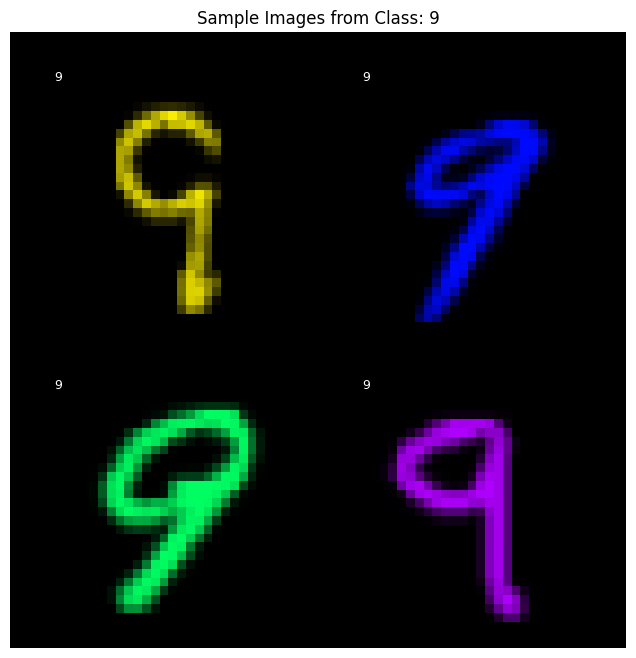

In [ ]:
show_images_from_loader(
    train_loaders[10], classes=mnist_classes, n_images=64)
for i in range(10):
    show_images_from_loader_of_class(
        classes=mnist_classes, loader=train_loaders[10], n_images=4, target_class_idx=i)

# Training

In [ ]:
models = {}

for dataset_idx in range(10):
    model = LeNetBasedModel().to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    models[dataset_idx] = model

    print(f"\n\n\n Training {dataset_idx + 1}th dataset\n")
    for epoch in range(1, 6):
        train_f(model, device, train_loaders[dataset_idx], optimizer, epoch)

    print(f"\nShowing test set result for  {dataset_idx + 1}th dataset\n")
    test(model, device, test_loaders[dataset_idx])
    print(f"\nShowing test set result for  benchmark {11}th dataset\n")
    test(model, device, test_loaders[10])




 Training 1th dataset

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315238
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.123974
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.063309
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.005741
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.004501
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.006405
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.016292
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.007474
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.006610
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.004235
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000939
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.000644
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.001388
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.001703
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.018360
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.000348
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.020952
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.007822
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.023132
Train Epoch: 2 [57600/60000 (96%)]	L

KeyboardInterrupt: 

In [ ]:
benchmark_model = LeNetBasedModel().to(device)
optimizer = optim.Adam(benchmark_model.parameters())
criterion = nn.CrossEntropyLoss()

benchmark_dataset = (train_loaders[10], test_loaders[10])


print(f"\n\n\n Training Benchmark dataset\n")
for epoch in range(1, 6):
    train_f(benchmark_model, device, benchmark_dataset[0], optimizer, epoch)

print(f"\nShowing test set result for  Benchmark dataset\n")
test(benchmark_model, device, test_loaders[dataset_idx])
print(f"\nShowing test set result for  the other dataset\n")
for dataset_idx in range(10):
    print(f"\nShowing test set result for  {dataset_idx + 1}th dataset\n")
    test(benchmark_model, device, test_loaders[dataset_idx])